## Exploratory Data Analysis


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", style="whitegrid", palette="Set2", color_codes=True, font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,10)


In [128]:
dt = pd.read_csv("gba_houses__.csv")
dt

,zona,loc,mtr2,ambs,valor
0,Norte,Pilar,300,2,280000
1,Norte,Pilar,135,4,185000
2,Norte,Pilar,120,4,149500
3,Norte,Pilar,200,5,324900
4,Norte,Pilar,108,5,115000
...,...,...,...,...,...
32526,Oeste,TresDeFebrero,150,3,135000
32527,Oeste,TresDeFebrero,50,2,4550000
32528,Oeste,TresDeFebrero,80,3,29999
32529,Oeste,TresDeFebrero,102,3,153000


In [129]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zona    32531 non-null  object
 1   loc     32531 non-null  object
 2   mtr2    32531 non-null  int64 
 3   ambs    32531 non-null  int64 
 4   valor   32531 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [130]:
# ambs = 0 --> NaN
dt[dt["ambs"]==0].shape
# 237 valores nulos en la columna de ambientes (ambs)
dt = dt.drop(dt[dt["ambs"]==0].index)

In [147]:
# Eliminar fila erronea. Datos incorrectos
dt["mtr2"].max(), dt[dt["mtr2"]==111111111].index
dt = dt.drop([4902])

In [131]:
dt["valor(miles)"] = dt["valor"] // 1000
dt = dt.drop(["valor"], axis=1)

## Varible Analysis
### and some adjustments

Analisis por zonas

Text(0, 0.5, 'Amount')

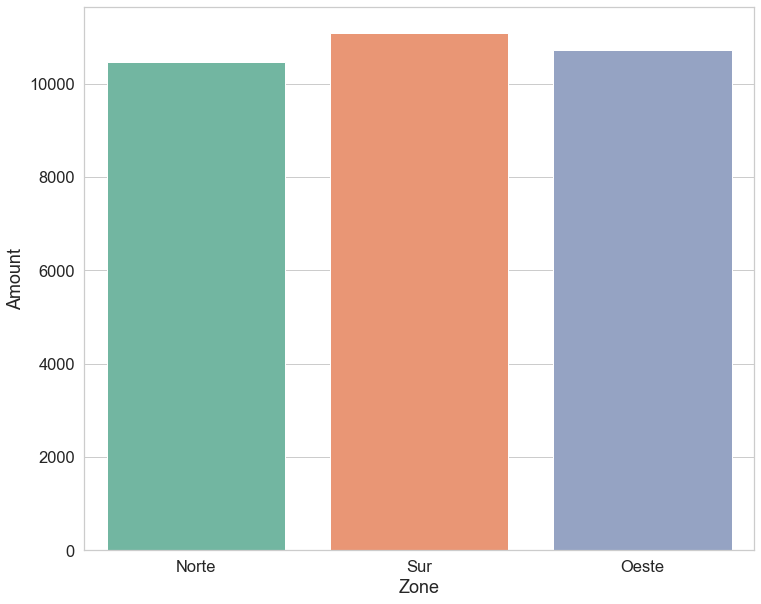

In [148]:
sns.countplot(
    data=dt,
    x="zona"
)
plt.xlabel("Zone")
plt.ylabel("Amount")

In [149]:
dt.groupby("zona").mean()

,mtr2,ambs,valor(miles)
zona,,,
Norte,224.359893,4.457342,375.953473
Oeste,179.048712,4.077641,229.046566
Sur,197.140990,4.278824,240.653655


Analisis por localidades

In [150]:
# Eliminando las localidades no tomadas en cuenta (pocos registros, casi nulos)
locs = dt["loc"].value_counts().nsmallest(15)[:10].index.tolist()
locs
for loc in locs:
    dt = dt.drop(dt[dt["loc"]==f"{loc}"].index)

In [151]:
dt["loc"].nunique()

26

Text(0.5, 0, 'Amount')

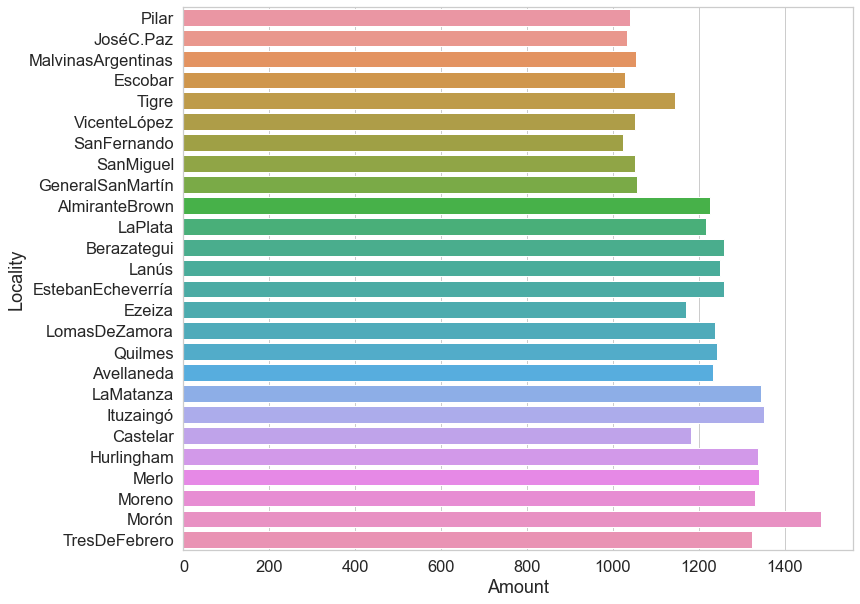

In [152]:
sns.countplot(
    data=dt,
    y="loc"
)
plt.ylabel("Locality")
plt.xlabel("Amount")

In [153]:
dt_loc = dt.groupby("loc").mean()

In [154]:
dt_loc[["valor(miles)"]].nlargest(3, "valor(miles)")


,valor(miles)
loc,
Tigre,523.556818
JoséC.Paz,441.503868
SanFernando,407.433594


In [155]:
dt_loc[["valor(miles)"]].nsmallest(3, "valor(miles)")


,valor(miles)
loc,
Avellaneda,150.697240
Lanús,159.192000
LaPlata,168.644207


In [156]:
dt_loc[["mtr2"]].nlargest(3, "mtr2")

,mtr2
loc,
Pilar,363.751923
Moreno,275.827327
Ezeiza,263.691453


In [157]:
dt_loc[["mtr2"]].nsmallest(3, "mtr2")

,mtr2
loc,
JoséC.Paz,149.293037
Merlo,151.485075
LaPlata,156.396056


Analisis por cantidad de ambientes

Text(0, 0.5, 'Amount')

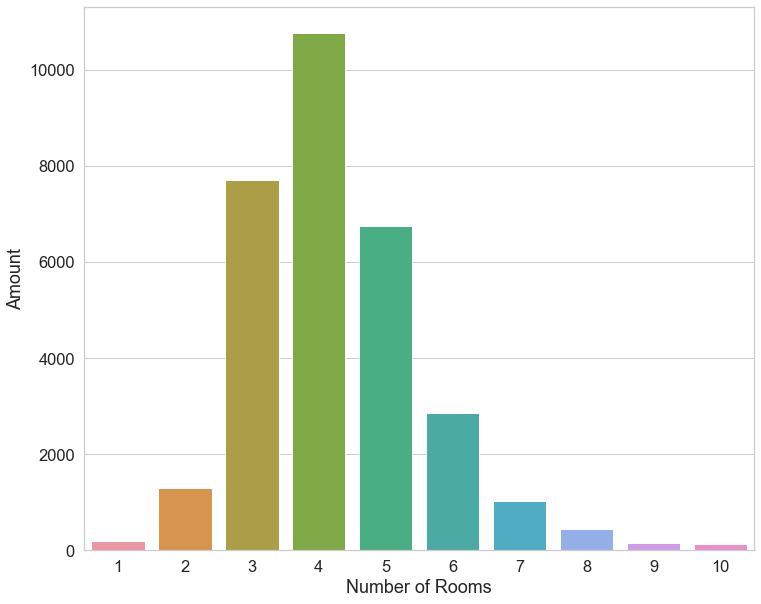

In [158]:
sns.countplot(
    x=dt["ambs"]
)
plt.xlabel("Number of Rooms")
plt.ylabel("Amount")


Analisis por valores de las propiedades

Text(0.5, 1.0, '[Zoom]')

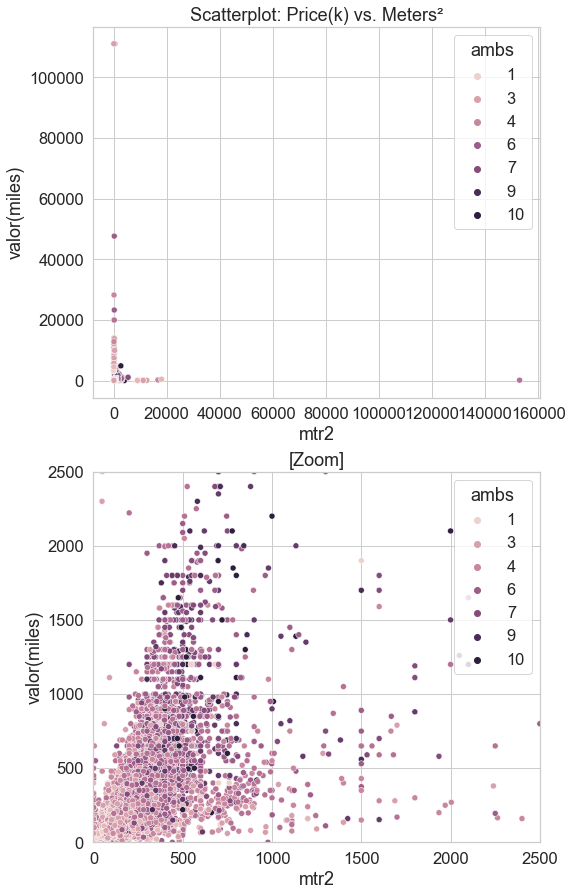

In [159]:
fig, axs = plt.subplots(2,1, figsize=(8,15))
sns.scatterplot(
    data=dt,
    x="mtr2",
    y="valor(miles)",
    hue="ambs",
    ax=axs[0]
)
axs[0].set_title("Scatterplot: Price(k) vs. Meters²")
sns.scatterplot(
    data=dt,
    x="mtr2",
    y="valor(miles)",
    hue="ambs",
    ax=axs[1]
)

axs[1].set_xlim(0,2500)
axs[1].set_ylim(0,2500)
axs[1].set_title("[Zoom]")


### Conclusiones

- Zona Norte tiene **alto promedio** en mt². Lo siguen zona Sur y Oeste.
- Zona Norte tiene **altos precios** en promedio, seguido por zona Sur y Oeste.
- La cantidad de ambientes mas comun es de **4**, seguido de 3 y luego de 5.
- El promedio de ambientes es de **4** en las tres zonas (Norte, Sur, Oeste).
- En general, a medida que aumentan los **metros²**, el **precio** y la cantidad de **ambientes** tambien aumentan.

- Las localidades mas **caras** en prom son Tigre, Jose C. Paz, y San Fernando, ambas 3 zona norte
- Las localidades mas **baratas** en prom son Avellaneda, Lanus y La Plata, zona sur
- Las localidades con **mas metros²** en promedio son Pilar, Moreno y Ezeina
- Las localidades con **menos metros²** en prom son Jose C. Paz, Merlo y Moron
- La localidad de **Jose C. Paz**, segun promedios, presenta propiedades de los mas **altos precios**, pero ofrece la **menor cantidad de ambientes**.


## Principal Component Analysis

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [161]:
dt_ = dt.drop(["zona", "loc"], axis=1)
dt_scale = StandardScaler().fit_transform(dt_)


Variables por componente:
Primera Componente / Segunda Componente
mtr2: 0.51 / 0.74
ambs: 0.68 / -0.02
valor(miles): 0.54 / -0.67


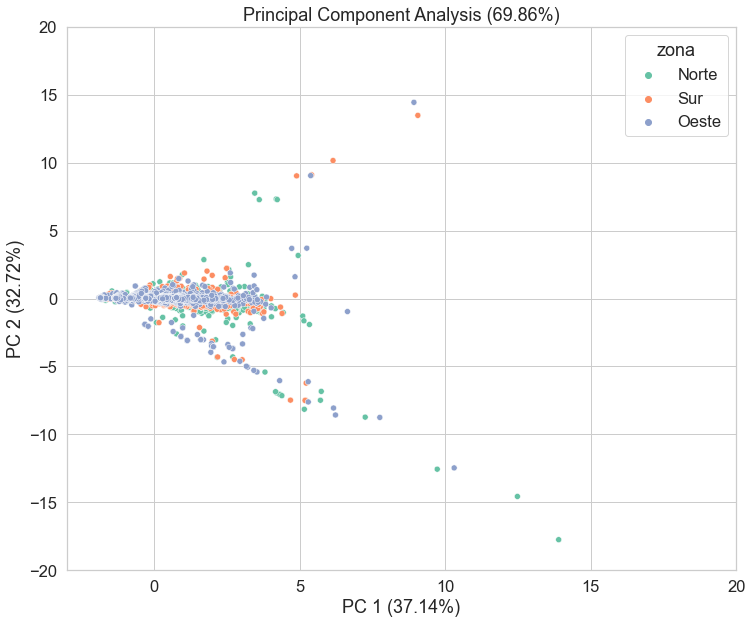

In [162]:
pca = PCA().fit(dt_scale)
dt_pca = pca.transform(dt_scale)

var = pca.explained_variance_ratio_
var1 = round(100*var[0], 2)
var2 = round(100*var[1], 2)

sns.scatterplot(
    x=dt_pca[:,0],
    y=dt_pca[:,1],
    hue=dt["zona"]
)
plt.xlabel("PC 1 ({}%)".format(var1))
plt.xlim(-3, 20)
plt.ylim(-20,20)
plt.ylabel("PC 2 ({}%)".format(var2))
plt.title(f"Principal Component Analysis ({var1 + var2}%)")

comp1 = pca.components_[0]
comp2 = pca.components_[1]

vars = dt_.columns #["mtr2", "ambs", "valor(miles)"]
print("""
Variables por componente:
Primera Componente / Segunda Componente""")
for i, j in enumerate(vars):
    print(f"""{vars[i]}: {round(comp1[i],2)} / {round(comp2[i],2)}""")

## Conclusiones
- El grafico por componentes principales representa un ∼70% (bueno) de la informacion del conjunto de datos.
- Visualmente el grafico no aporta mucha informacion.
- En la primer componente principal influye en mayor medida la cantidad de ambientes de la propiedad. Pero los metros² y el valor no se quedan atras en importancia.
- En la segunda componente principal se destacan en gran medida la cantidad de metros² de la propiedad y su respectivo valor.

